In [451]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tracemalloc

In [452]:
random_10_int_array = np.random.randint(0, 100, size=10)  
random_10_float_array = np.random.uniform(0.1, 99.9, size=10) 

random_100_int_array = np.random.randint(0, 100, size=100)  
random_100_float_array = np.random.uniform(0.1, 99.9, size=100)  

random_1000_int_array = np.random.randint(0, 100, size=1000)  
random_1000_float_array = np.random.uniform(0.1, 99.9, size=1000)  

random_10000_int_array = np.random.randint(0, 100, size=10000)  
random_10000_float_array = np.random.uniform(0.1, 99.9, size=10000)  

#Для зручності роботи з функціями створюємо список, який буде містити списки, заповнені рандомними числами
arrays = [
    ("10 Integers", random_10_int_array),
    ("10 Floats", random_10_float_array),
    ("100 Integers", random_100_int_array),
    ("100 Floats", random_100_float_array),
    ("1000 Integers", random_1000_int_array),
    ("1000 Floats", random_1000_float_array),
    ("10000 Integers", random_10000_int_array),
    ("10000 Floats", random_10000_float_array)
]

In [453]:
def reverse_array(array):
    if(len(array) == 1):
        return array
    reversed_array = []
    for i in range(len(array) -1,-1,-1):
        reversed_array.append(array[i])
    return reversed_array

In [463]:
def bubble_sort(l):
    "Sorts l in place and returns it."
    for passesLeft in range(len(l)-1, 0, -1):
        for index in range(passesLeft):
            if l[index] > l[index + 1]:
               l[index], l[index + 1] = l[index + 1], l[index]
    return l

In [455]:
def insertion_sort(array):
    for i in range(1, len(array)):
        current = array[i]
        j = i - 1
        while j >= 0 and current < array[j]:
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = current
    return array

In [456]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    low = []
    high = []
    equal = []

    for num in arr:
        if num < pivot:
            low.append(num)
        elif num > pivot:
            high.append(num)
        else:
            equal.append(num)

    return quick_sort(low) + equal + quick_sort(high)

In [457]:
def binary_search(array, item):
    low = 0
    high = len(array) - 1

    while low <= high:
        mid = (low + high) // 2
        guess = array[mid]
        if guess == item:
            return mid
        elif guess < item:
            low = mid + 1
        else:
            high = mid - 1
    return -1

In [458]:
def measure_algorithm(algorithm, array, *args):
    start_time = time.time()
    tracemalloc.start()
    if algorithm == binary_search:
        result = algorithm(array, *args)
    else:
        result = algorithm(array)
    end_time = time.time()
    time_of_execution = end_time - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop() 
    return time_of_execution, peak 

reverse_array with 10 Integers: Time taken - 0.0 seconds, Memory used - 400 
reverse_array with 10 Floats: Time taken - 0.0 seconds, Memory used - 400 
reverse_array with 100 Integers: Time taken - 0.0 seconds, Memory used - 3296 
reverse_array with 100 Floats: Time taken - 0.0 seconds, Memory used - 3296 
reverse_array with 1000 Integers: Time taken - 0.0021066665649414062 seconds, Memory used - 32832 
reverse_array with 1000 Floats: Time taken - 0.0 seconds, Memory used - 32832 
reverse_array with 10000 Integers: Time taken - 0.008861780166625977 seconds, Memory used - 325152 
reverse_array with 10000 Floats: Time taken - 0.012873172760009766 seconds, Memory used - 325262 
bubble_sort with 10 Integers: Time taken - 0.0 seconds, Memory used - 112 
bubble_sort with 10 Floats: Time taken - 0.0 seconds, Memory used - 112 
bubble_sort with 100 Integers: Time taken - 0.007403373718261719 seconds, Memory used - 112 
bubble_sort with 100 Floats: Time taken - 0.009496212005615234 seconds, Mem

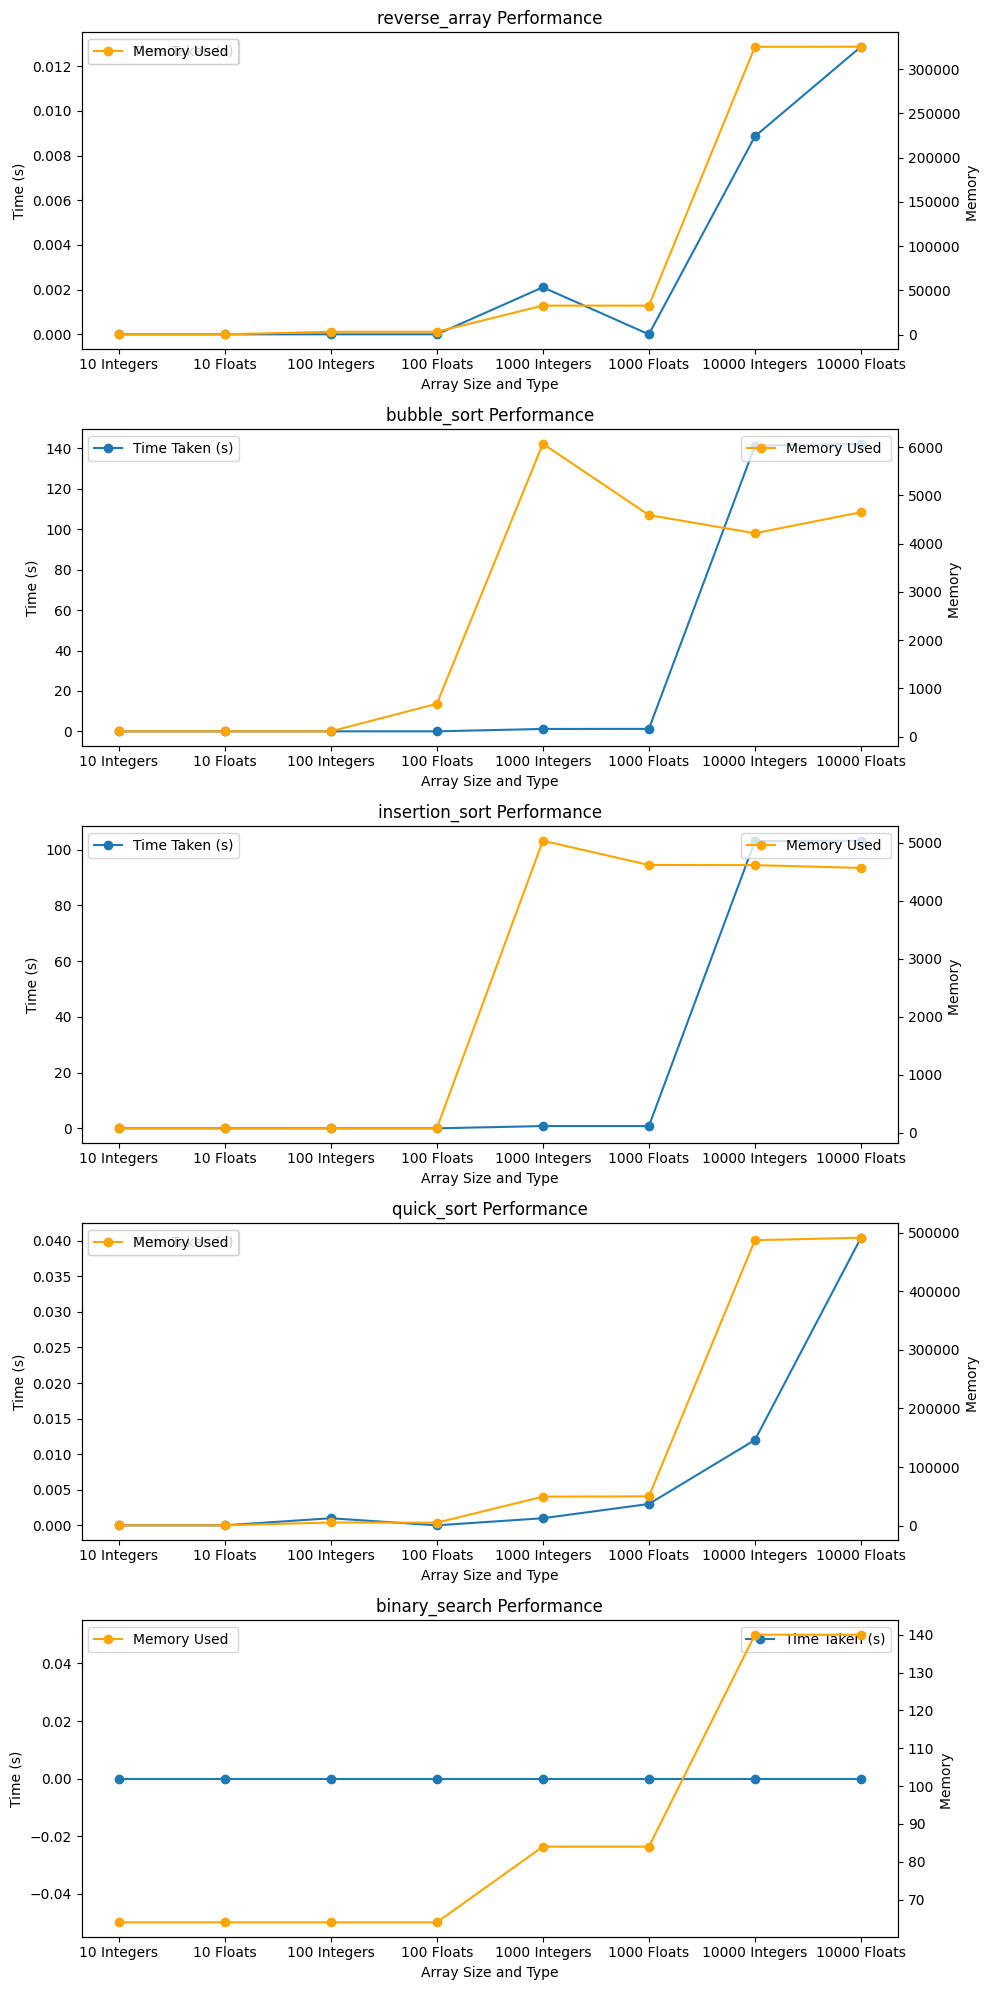

In [459]:

algorithms = [reverse_array, bubble_sort, insertion_sort, quick_sort, binary_search]

fig, axs = plt.subplots(5, figsize=(10, 20))

for j, algorithm in enumerate(algorithms):
    time_taken_list = []
    memory_used_list = []
    for array_name, array in arrays:
        if algorithm == binary_search:
            time_taken, memory_used = measure_algorithm(algorithm, quick_sort(array), 14)
        else:
            time_taken, memory_used = measure_algorithm(algorithm, array)
        print(f"{algorithm.__name__} with {array_name}: Time taken - {time_taken} seconds, Memory used - {memory_used} ")
        time_taken_list.append(time_taken)
        memory_used_list.append(memory_used)


    axs[j].plot([name for name, _ in arrays], time_taken_list, label='Time Taken (s)', marker='o')
    axs[j].set_xlabel('Array Size and Type')
    axs[j].set_ylabel('Time (s)')
    axs[j].set_title(f'{algorithm.__name__} Performance')
    axs[j].legend()


    axs_mem = axs[j].twinx()
    axs_mem.plot([name for name, _ in arrays], memory_used_list, color='orange', label='Memory Used ', marker='o')
    axs_mem.set_ylabel('Memory ')
    axs_mem.legend()

plt.tight_layout()
plt.show()